In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [51]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [5]:
training_data = datasets.FashionMNIST(root='data', download=True, train=True, transform=transforms.ToTensor())
test_data = datasets.FashionMNIST(root='data', download=True, train=False, transform=transforms.ToTensor())

In [6]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [7]:
len(train_dataloader), len(test_dataloader), 938*64, 157*64

(938, 157, 60032, 10048)

In [8]:
len(train_dataloader.dataset), len(test_dataloader.dataset), len(test_dataloader.dataset) // 64, len(test_dataloader)

(60000, 10000, 156, 157)

In [10]:
train_dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [12]:
learning_rate, epochs, batch_size = 1e-3, 5, 64

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss : {loss:>7f}  [{current:>5d} / {size:>5d}]")

In [18]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)
            test_loss += loss.item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= num_batches
    correct /= size
    print(f"Test Error :\nAccuracy:{(100 * correct):>0.1f}%, Avg loss : {test_loss:>8f}\n")

In [19]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-----------------------------------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-----------------------------------------------------------
loss : 2.374492  [    0 / 60000]
loss : 0.541933  [ 6400 / 60000]
loss : 0.402973  [12800 / 60000]
loss : 0.514735  [19200 / 60000]
loss : 0.444151  [25600 / 60000]
loss : 0.397904  [32000 / 60000]
loss : 0.299146  [38400 / 60000]
loss : 0.459271  [44800 / 60000]
loss : 0.406290  [51200 / 60000]
loss : 0.417299  [57600 / 60000]
Test Error :
Accuracy:84.9%, Avg loss : 0.407114

Epoch 2
-----------------------------------------------------------
loss : 0.325667  [    0 / 60000]
loss : 0.333617  [ 6400 / 60000]
loss : 0.257497  [12800 / 60000]
loss : 0.312479  [19200 / 60000]
loss : 0.333988  [25600 / 60000]
loss : 0.297139  [32000 / 60000]
loss : 0.240115  [38400 / 60000]
loss : 0.339915  [44800 / 60000]
loss : 0.321944  [51200 / 60000]
loss : 0.368447  [57600 / 60000]
Test Error :
Accuracy:85.7%, Avg loss : 0.384522

Epoch 3
-----------------------------------------------------------
loss : 0.256506  [    0 / 60000]
los

In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
labels = np.arange(10)
tags = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
label_tags = dict(zip(labels, tags))
print(label_tags)

{0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}


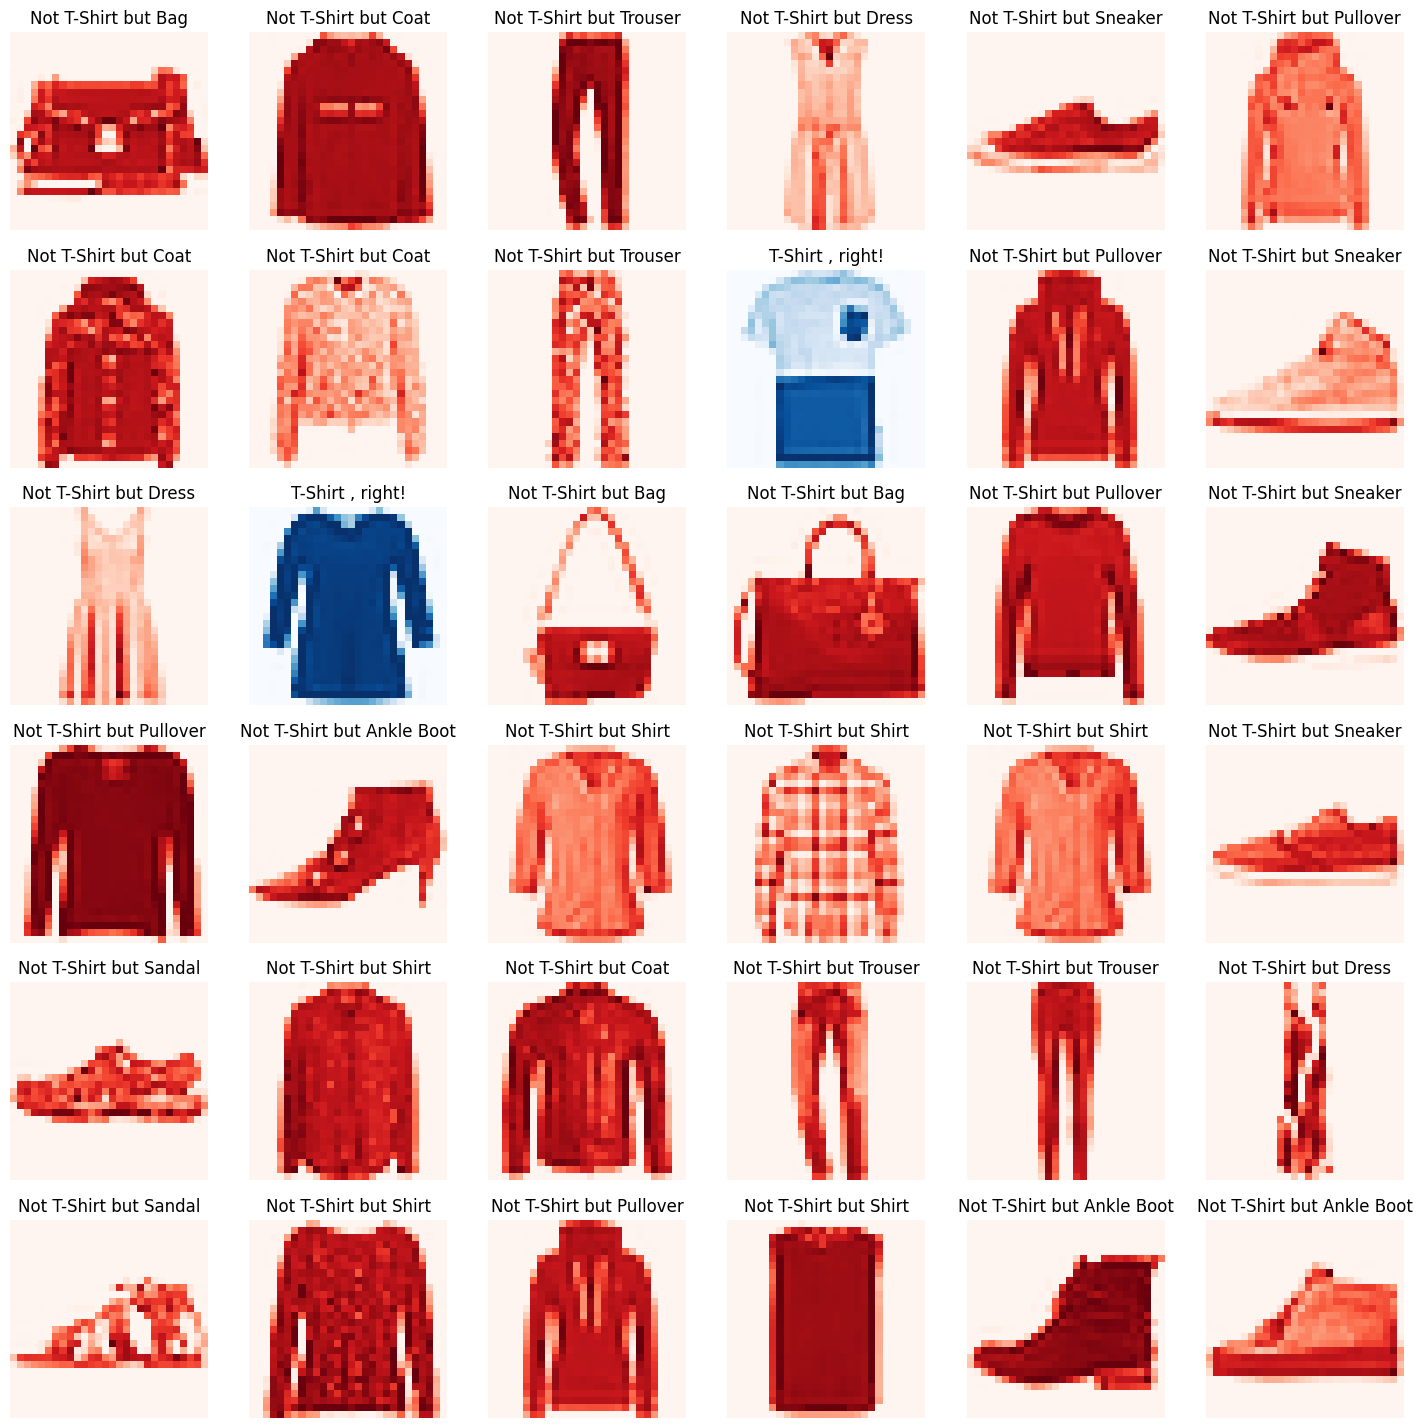

In [175]:
columns, rows = 6, 6
plt.rcParams["figure.figsize"] = (18, 18)

for i in range(columns*rows):    
    
    data_idx = np.random.randint(len(test_dataloader))
    input_img = test_data[data_idx][0].unsqueeze(dim=0)            # from (1,28,28)  to (1,1,28,28)
    input_img = input_img.to(device)
    
    model.eval()
    
    with torch.no_grad():
        output = model(input_img)      
        _, argmax = torch.max(output, 1)
        
    pred = label_tags[argmax.item()]
    label = label_tags[test_data[data_idx][1]]
    
    plt.subplot(rows, columns, i+1)
    if pred == label:
        plt.title(pred + ' , right!')
        cmap = 'Blues'
    else:
        plt.title('Not ' + pred + ' but ' + label)
        cmap = 'Reds'
        
    plot_img = test_data[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')
    
    
plt.show()